![header](img/logos_header2.png)

# GMES and Africa - Copernicus Marine Services Capacity Building

<div style="text-align: right"><i> 02-CBM-PRODUCT-TIMESERIES </i></div>

***
<center><h1> Earth Observation for Coral Bleaching Monitoring :</h1> <h2>Producing timeseries of Sea Surface Temperature derived products</h2></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
    - [2.1. Sea Surface Temperature (SST) data](#2.1.-Sea-Surface-Temperature-(SST)-data)
- [3. Download the data and manage NetCDF files](#3.-Download-the-data-and-manage-NetCDF-files)
- [4. Hands on : use Python and load SST data](#4.-Hands-on-:-use-Python-and-load-SST-data)
    - [4.1. Required Python modules](#4.1.-Required-Python-modules) 
    - [4.2. Load the data products](#4.2.-Load-the-data-products)
    - [4.3. Create timeseries of products for a specific location](#4.3.-Create-timeseries-of-products-for-a-specific-location)
    - [4.4. Plotting the data for a study location](#4.4.-Plotting-the-data-for-a-study-location)
- [5. Conclusion](#5.-Conclusion) 

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)

Water temperature is one of the cruicial water quality parameters for growth and survival of marine organisms, with different organisms having different optimal and tolerable ranges. The water temperature also relates to the solubility of dissolved gasses (e.g. oxygen and carbon dioxide) and resulting pH. 

From a satellite perspective some sensors are capable of monitoring the surface layer of the ocean, known as the Sea Surface Temperature or SST.

The methodology used to derive the Coral Bleaching Monitoring products is based upon those developed by [NOAA Coral Reef Watch](https://coralreefwatch.noaa.gov/main/). Please note: The climatology data used in this practical are derived from different SST data and over a different time period than what NOAA uses. It is possible to use the NOAA climatologies instead - it will just require you to regrid the climatology to the same grid as the SST used to create the derived products. 

# 2. About the data

[Go back to the "Table of contents"](#Table-of-contents)

We are going to analyse the foundation sea surface temperature data for the area of the Red Sea
 

| Parameter | Value |
| :---: | :---|
| **Frequency** | daily-mean |
| **Lat min** | 12 |
| **Lat max** | 30 |
| **Lon min** | 32 |
| **Lon max** | 44 |
| **Timesteps** | from 2023-01-01 to 2024-09-01 |


## 2.1. Sea Surface Temperature (SST) data
[Go back to the "Table of contents"](#Table-of-contents)

*Variables used :* analysed_sst *(Sea surface foundation temperature)*

***

*Product identifier* : [SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001](https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/description)

*Spatial resolution* : 0.05° x 0.05°

*Temporal resolution* : daily mean

*Description* : The Operational Sea Surface Temperature and Ice Analysis (OSTIA) system is run by the UK's Met Office and delivered by IFREMER PU. For the Global Ocean - the OSTIA global foundation Sea Surface Temperature product provides daily gap-free maps of: Foundation Sea Surface Temperature at 0.05° x 0.05° horizontal grid resolution, using in-situ and satellite data from both infrared and microwave radiometers. This product provides the foundation Sea Surface Temperature, which is the temperature free of diurnal variability.  OSTIA uses satellite data provided by the GHRSST project together with in-situ observations to determine the sea surface temperature.

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-SST-PUM-010-001.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-SST-QUID-010-001.pdf)

# 3. Download the data and manage NetCDF files

[Go back to the "Table of contents"](#Table-of-contents)

There are multiple ways to access the OSTIA SST data in the DUNIA platform. Some of the data are located under  <code>/eodata/CMEMS/REP/NRT/SST/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001</code>, but in this case you will have to load in multiple netcdf files and subset to your region of interest. 

Another option is to use the your copernicus marine service login information together with the <code>copernicusmarine</code> toolbox, and to download a spatial and temporal subset of the dataset. 

For this notebook we have prepared a spatio-temporal subset, obtained using the Copernicus Marine Toolbox. The dataset can be found in the same folder as this notebook


# 4. Hands on : use Python and load SST data
## 4.1. Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem. Most of these are already inluded in the DUNIA sandbox.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html/) is a library for plotting maps and geospatial data analyses in Python |

<div class="alert alert-block alert-success"

<b> Importing modules </b>
* Unlike MATLAB, Python libraries need to be *imported* before they can be used
* Imported libraries usually have a namespace
* Portions of libraries, can be imported

In [1]:
import numpy as np
import copernicusmarine
import xarray
import CBM_utilities as cbm
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd

# Import libraries
import os

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

On the first attempt to run this notebook you might find that a <code>ModuleNotFoundError</code> appears in a red box below. This just means that you need to install the missing module(s). To do this, you use the <code>!pip install module-name</code>. We recommend you remove the # from the next line and run it once, after which all the modules should be installed. Remember to re-run the import cell above in order to make sure that everything is imported correctly.

In [2]:
#!pip install numpy xarray matplotlib cartopy copernicusmarine

## 4.2. Load the data products


[Go back to the "Table of contents"](#Table-of-contents)

We are now all set to start loading the downloaded dataset. We will also just load our specific region of interest by using the "slice" fuction:

In [3]:
## load in the OSTIA SST data:
data = xarray.open_dataset("METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_32.03E-43.97E_12.02N-29.98N_2023-01-01-2024-09-01.nc")
lat = data.latitude.data
lon = data.longitude.data

## load in the climatology data:
clim_mean = xarray.open_dataset("redsea_sst_mean_clim.nc")
clim_max = xarray.open_dataset("redsea_max_monthly_mean.nc")

Let's see what the downloaded file looks like:

In [4]:
data

<xarray.Dataset> Size: 422MB
Dimensions:       (time: 610, latitude: 360, longitude: 240)
Coordinates:
  * latitude      (latitude) float32 1kB 12.02 12.07 12.12 ... 29.88 29.92 29.98
  * longitude     (longitude) float32 960B 32.03 32.08 32.12 ... 43.92 43.97
  * time          (time) datetime64[ns] 5kB 2023-01-01 2023-01-02 ... 2024-09-01
Data variables:
    analysed_sst  (time, latitude, longitude) float64 422MB ...
Attributes: (12/48)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              enquiries@metoffice.gov.uk
    ...                         ...
    time_coverage_end:          20240119T000000Z
    time_coverage_start:        20240118T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       536d4865-f5a8-45b2-806f-1f1db491069a
    westernmost_longitude:      -180.0
    copernicusmarine_version:   1.2.4

You can see that the dataset contains one variable called "analysed_sst", it covers just the latitudes and longitudes of the Red Sea, and spans a time range of 2023-01-01 to 2024-09-01 (which is 610 individual time steps)


## 4.3. Create timeseries of products for a specific location

[Go back to the "Table of contents"](#Table-of-contents)

Firstly let's select the *coordinates* (latitude and longitude in decimal degrees) of a specific location that we want to investigate. As an example we have selected a location close to the coral reefs off Hurghada. 

Let's also select *start date* and a *end date* in the range **between 2023-04-01 and 2024-09-01** for which we will derive the different CBM products over the entire period.

(Note that we need to have 12 weeks of data available before the selected date in order to be able to calculate the Degree Heating Weeks product)

In [5]:
## Input start and end date of analysis period:
start_date = "2023-04-01"
last_date = "2024-04-01"

## Input coordinates of study location:
#Gulf of Suez
site1lat = 29.115652 
site1lon = 32.795755

#Gulf of Aqaba
site2lat = 28.623413  
site2lon = 34.656915

#Al Madinah and Makkah
site3lat = 21.217024 
site3lon = 39.07347

#Sudan
site4lat = 20.460807  
site4lon = 37.328782

Next we select the data over the selected time period, and calculate the **Observed SST**, **SST anomaly**, **Hotspots**, **Degree Heating Week**, and **Bleaching Alert Area** products. This step can take a few minutes, so please be patient!

In [6]:
%%time
sdate = datetime.strptime(start_date, '%Y-%m-%d') 
edate = datetime.strptime(last_date, '%Y-%m-%d') 

all_dates = pd.date_range(sdate,edate-timedelta(days=1),freq='d')

sst_array = data.sel(time=slice(start_date, last_date))

## Calculate the anomaly and hotspot slice for same daterange:
anomaly_array = np.zeros((sst_array.analysed_sst.shape)) * np.nan
hotspots_array = np.zeros((sst_array.analysed_sst.shape)) * np.nan
idx = 0
for date in all_dates:
    datestr = date.strftime('%Y-%m-%d')
    sst_step = sst_array.sel(time=date).analysed_sst.values
    date_mean_clim = cbm.get_daily_sst_clim(clim_mean, datestr)
    anomaly_array[idx,:,:] = sst_step - date_mean_clim
    hotspot_date = sst_step - clim_max.analysed_sst.values
    hotspots_array[idx,:,:] = np.where(hotspot_date>=0, hotspot_date, 0) 
    idx = idx+1

## Calculate the degree heating weeks slice for same daterange (takes 2 mins):
dhw = np.zeros((sst_array.analysed_sst.shape)) * np.nan
idx = 0
for date in all_dates:
    start_date = date - timedelta(days=84)
    end_date = date - timedelta(days=1)    
    sst_slice = data.sel(time=slice(start_date, end_date))
    avail_dates = sst_slice.time
    hotspots_84 = np.zeros((sst_slice.analysed_sst.shape)) * np.nan
    hotspots_over1 = np.zeros((sst_slice.analysed_sst.shape)) * np.nan
    index = 0
    for date2 in avail_dates:
        ts = pd.to_datetime(date2.values) 
        datestr = ts.strftime('%Y-%m-%d')
        sst_step = data.sel(time=date2).analysed_sst.values
        #date_max_clim = cbm.get_daily_sst_clim(clim_max, datestr)
        #hotspot_date = sst_array - date_max_clim
        hotspot_date = sst_step - clim_max.analysed_sst.values
        hotspots_84[index,:,:] = np.where(hotspot_date>=0, hotspot_date, 0) 
        hotspots_over1[index,:,:] = np.where(hotspot_date>=1, hotspot_date, 0) 
        index = index+1     
    dhw[idx,:,:] = np.nansum(hotspots_over1, axis=0) / 7
    idx = idx+1
    
## Calculate the bleaching alert area (based on hotspots and dhw):
bleaching_array = np.zeros((dhw.shape)) * np.nan
bleaching_array[np.where(hotspots_array <= 0)] = 0
bleaching_array[np.where(np.logical_and(hotspots_array > 0, hotspots_array < 1))] = 1
bleaching_array[np.where(np.logical_and(hotspots_array >= 1,  np.logical_and(dhw>0, dhw<4)))] = 2
bleaching_array[np.where(np.logical_and(hotspots_array >= 1,  np.logical_and(dhw>=4, dhw<8)))] = 3
bleaching_array[np.where(np.logical_and(hotspots_array >= 1,  np.logical_and(dhw>=8, dhw<12)))] = 4
bleaching_array[np.where(np.logical_and(hotspots_array >= 1,  np.logical_and(dhw>=12, dhw<16)))] = 5
bleaching_array[np.where(np.logical_and(hotspots_array >= 1,  np.logical_and(dhw>=16, dhw<20)))] = 6
bleaching_array[np.where(np.logical_and(hotspots_array >= 1, dhw>=20))] = 7

## turn all the numpy arrays into xarrays:
sst_xr = xarray.DataArray(sst_array.analysed_sst[:-1,:,:]-273.15, 
coords={'time': all_dates,'lat': lat,'lon': lon}, 
dims=["time","lat", "lon"])

anom_xr = xarray.DataArray(anomaly_array[:-1,:,:], 
coords={'time': all_dates,'lat': lat,'lon': lon}, 
dims=["time","lat", "lon"])

hs_xr = xarray.DataArray(hotspots_array[:-1,:,:], 
coords={'time': all_dates,'lat': lat,'lon': lon}, 
dims=["time","lat", "lon"])

dhw_xr = xarray.DataArray(dhw[:-1,:,:], 
coords={'time': all_dates,'lat': lat,'lon': lon}, 
dims=["time","lat", "lon"])

baa_xr = xarray.DataArray(bleaching_array[:-1,:,:], 
coords={'time': all_dates,'lat': lat,'lon': lon}, 
dims=["time","lat", "lon"])

CPU times: user 1min 16s, sys: 20.7 s, total: 1min 36s
Wall time: 1min 37s


## 4.4. Plotting the data for a study location

[Go back to the "Table of contents"](#Table-of-contents)

Let's explore each of the datasets

Text(0.5, 1.0, '')

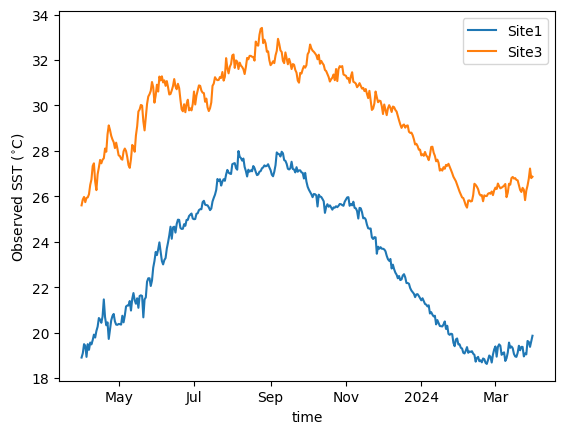

In [7]:
sst_s1 = sst_xr.sel(lon=site1lon, lat=site1lat, method="nearest")
sst_s2 = sst_xr.sel(lon=site3lon, lat=site3lat, method="nearest")
sst_s1.plot()
sst_s2.plot()
plt.legend(['Site1', 'Site3']) 
plt.ylabel('Observed SST ($^{\circ}$C)')
plt.title('')

Text(0.5, 1.0, '')

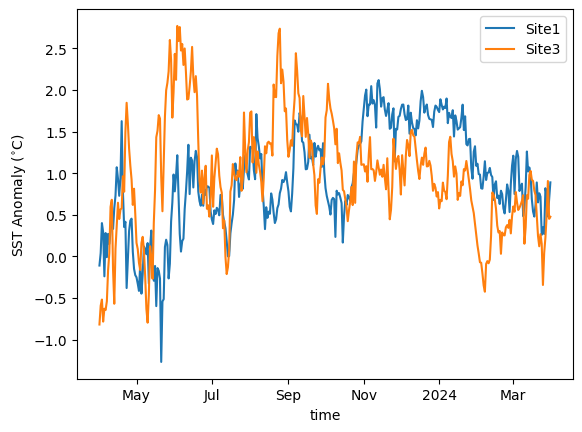

In [8]:
anom_s1 = anom_xr.sel(lon=site1lon, lat=site1lat, method="nearest")
anom_s2 = anom_xr.sel(lon=site3lon, lat=site3lat, method="nearest")
anom_s1.plot()
anom_s2.plot()
plt.legend(['Site1', 'Site3']) 
plt.ylabel('SST Anomaly ($^{\circ}$C)')
plt.title('')

Text(0.5, 1.0, '')

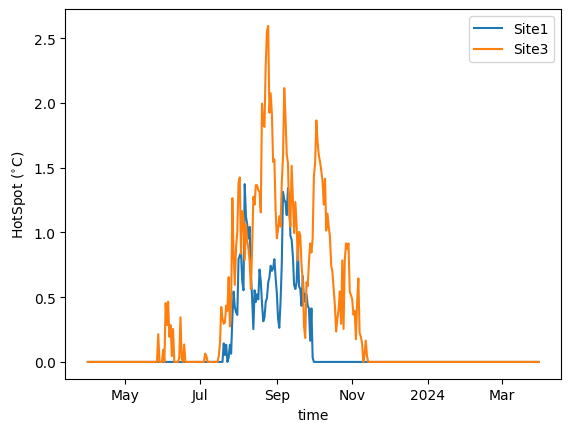

In [9]:
hs_s1 = hs_xr.sel(lon=site1lon, lat=site1lat, method="nearest")
hs_s2 = hs_xr.sel(lon=site3lon, lat=site3lat, method="nearest")
hs_s1.plot()
hs_s2.plot()
plt.legend(['Site1', 'Site3']) 
plt.ylabel('HotSpot ($^{\circ}$C)')
plt.title('')

Text(0.5, 1.0, '')

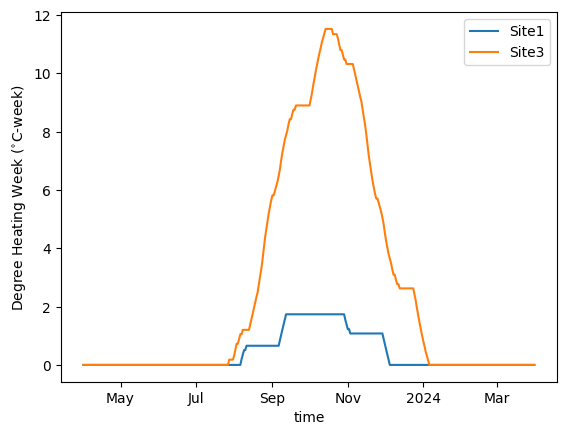

In [10]:
dhw_s1 = dhw_xr.sel(lon=site1lon, lat=site1lat, method="nearest")
dhw_s2 = dhw_xr.sel(lon=site3lon, lat=site3lat, method="nearest")
dhw_s1.plot()
dhw_s2.plot()
plt.legend(['Site1', 'Site3']) 
plt.ylabel('Degree Heating Week ($^{\circ}$C-week)')
plt.title('')

Text(0.5, 1.0, '')

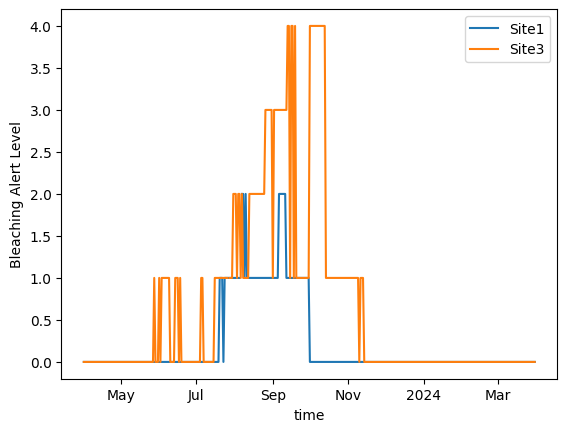

In [11]:
baa_s1 = baa_xr.sel(lon=site1lon, lat=site1lat, method="nearest")
baa_s2 = baa_xr.sel(lon=site3lon, lat=site3lat, method="nearest")
baa_s1.plot()
baa_s2.plot()
plt.legend(['Site1', 'Site3']) 
plt.ylabel('Bleaching Alert Level')
plt.title('')

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---
    
Try to reproduce the output figures for a different location and date range  
    
</div> 

# 5. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

This exercise has shown you how to load and plot SST data downloaded from Copernicus Marine Services, and how to derive the relevant satellite SST derived Coral Bleaching Monitoring products over a period of time. You are now also able to plot a timeseries of these products for a selected location.


<div class="alert alert-block alert-success">
    <b>Congratulations ! </b><br>
  
--- 

This training notebook is over and you can now investigate Satellite SST data and plot the derived Coral Bleaching Monitoring products! In the other Jupyter Notebook of this training you will produce maps of these products for a chosen date. Take a look!